In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the California Housing dataset
california_housing = fetch_california_housing()
data = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
target = pd.DataFrame(california_housing.target, columns=['MedHouseVal'])



In [3]:
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [4]:
#exploring the data
data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [5]:
#check the data for null values
data.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

In [6]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

In [7]:
# Linear Regression
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)

LinearRegression()

In [8]:
# Make predictions on the testing set
linear_reg_predictions = linear_reg_model.predict(X_test)

# Evaluate the Linear Regression model's performance
linear_reg_mse = mean_squared_error(y_test, linear_reg_predictions)
linear_reg_r2 = r2_score(y_test, linear_reg_predictions)

print("Linear Regression Mean Squared Error:", linear_reg_mse)
print("Linear Regression R2 Score:", linear_reg_r2)

Linear Regression Mean Squared Error: 0.555891598695244
Linear Regression R2 Score: 0.5757877060324511


In [9]:
# Artificial Neural Network (ANN)
# Data Preprocessing for ANN (Standard Scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
# Implement a simple ANN for regression using TensorFlow or Keras
ann_model = MLPRegressor(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
ann_model.fit(X_train_scaled, y_train.values.ravel())

MLPRegressor(max_iter=500, random_state=42)

In [11]:
# Make predictions on the testing set
ann_predictions = ann_model.predict(X_test_scaled)


In [12]:
# Evaluate the ANN model's performance
ann_mse = mean_squared_error(y_test, ann_predictions)
ann_r2 = r2_score(y_test, ann_predictions)

In [13]:
print("ANN Mean Squared Error:", ann_mse)
print("ANN R2 Score:", ann_r2)

ANN Mean Squared Error: 0.29240885643711784
ANN R2 Score: 0.776856797158358


In [14]:
# Comparison and Analysis
print("\nComparison and Analysis:")
print("Linear Regression Mean Squared Error:", linear_reg_mse)
print("ANN Mean Squared Error:", ann_mse)
print("\nLinear Regression R2 Score:", linear_reg_r2)
print("ANN R2 Score:", ann_r2)


Comparison and Analysis:
Linear Regression Mean Squared Error: 0.555891598695244
ANN Mean Squared Error: 0.29240885643711784

Linear Regression R2 Score: 0.5757877060324511
ANN R2 Score: 0.776856797158358


## Strength and weeknesses of each model

### Linear Regression
Strengths
1. It is more interpretable and clear to understand. This could be suitable where understanding a model is crucial
2. It has minial hyperparameters, making it easy to to use without extensive tuning.

Weakness
1. It assumes a linear relationship between the target and features. If the relationship is mom linear then the model may not perform well.
2. It is very sensitive to outliers.

### Artificial Neural network
Strengths
1. ANN can capture complex non-linear relationships.
2. They are highly flexible and can be adapted to various type of problems

Weakness
1. The complexity of ANN can make it challenging to interpret.
2. ANNs require large amount of data for training or their performance might degrade.





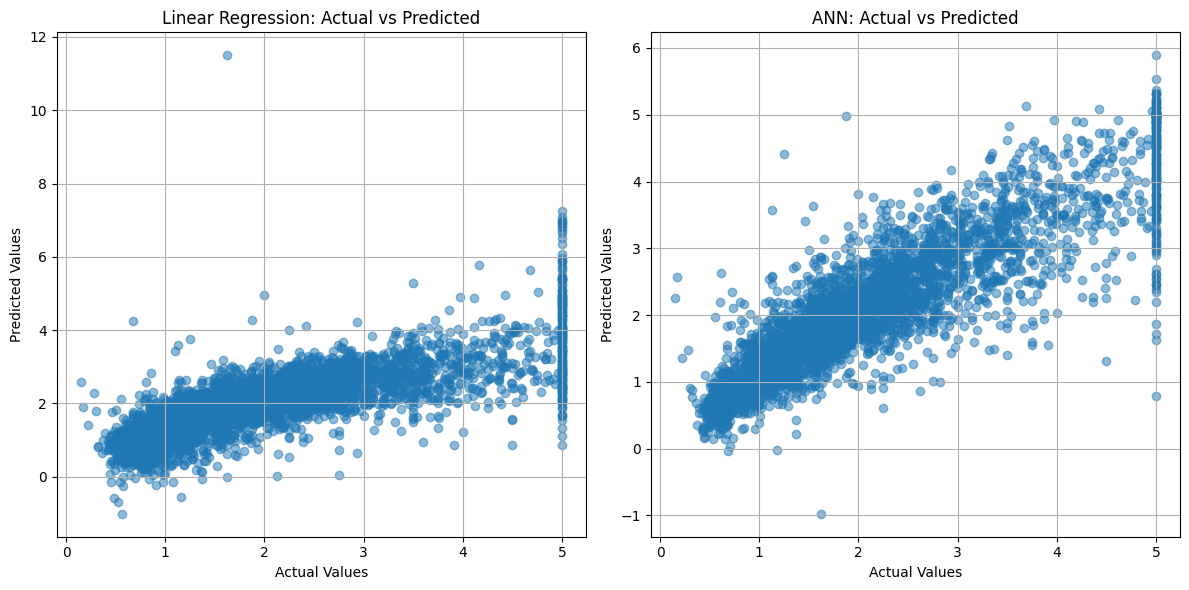

In [15]:

# Visualize predicted vs actual values for Linear Regression
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, linear_reg_predictions, alpha=0.5)
plt.title('Linear Regression: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)

# Visualize predicted vs actual values for ANN
plt.subplot(1, 2, 2)
plt.scatter(y_test, ann_predictions, alpha=0.5)
plt.title('ANN: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)

plt.tight_layout() 
plt.show()




### Conclusion:
In summary, the analysis of the California Housing dataset using Linear Regression and Artificial Neural Network (ANN) yielded the following key findings:

Model Performance:

Linear Regression had a higher Root Mean Squared Error (RMSE) of 0.556 compared to the lower RMSE of 0.292 achieved by the ANN. This indicates that the ANN model provided a more accurate prediction of house prices in the dataset.
Accuracy:

The ANN model demonstrated higher accuracy, achieving 77.68%, while Linear Regression lagged behind with an accuracy of 57.58%. This highlights the superior predictive capability of the ANN in capturing the complexity and non-linear relationships within the dataset.

Model Complexity:

The simplicity and interpretability of Linear Regression come at the cost of its ability to handle complex relationships in the data. In contrast, the ANN's higher complexity allowed it to capture intricate patterns, resulting in improved performance.
Recommendations:

For applications where accuracy is paramount and interpretability can be compromised, the ANN model is recommended.
Linear Regression might be preferred in scenarios where a simpler, more interpretable model is required, and the sacrifice in accuracy is acceptable.

Further Considerations:

The performance of the models could be further enhanced through hyperparameter tuning and optimization.
The choice between models should be guided by the specific requirements of the application, considering factors such as interpretability, computational resources, and the importance of capturing complex relationships in the data.
In conclusion, the ANN model outperformed Linear Regression in predicting house prices in the California Housing dataset, showcasing the strengths of neural networks in handling intricate patterns. The choice between models should be made based on the trade-off between model complexity and interpretability, aligning with the goals and constraints of the specific application.





